# Рабочая тетрадь 3
## Лищенко Т.В. ИМБО-01-22

# 1.1. Теоретический материал – Функции Python

Перед тем как рассматривать задачи классификации вспомним
понятие функции (метода) в Python. Функция в python - объект,
принимающий аргументы и возвращающий значение. Обычно функция
определяется с помощью инструкции `def`.

Определим простейшую функцию:
``` python
def add(x, y):
 return x + y
```

Инструкция return говорит, что нужно вернуть значение. В нашем
случае функция возвращает сумму x и y. Теперь мы ее можем вызвать:

``` python
add(1, 10)
add('abc', 'def')
'abcdef'
```

Функция может быть любой сложности и возвращать любые объекты
(списки, кортежи, и даже функции):
``` python
def newfunc(n):
 def myfunc(x):
 return x + n
 return myfunc
new = newfunc(100) # new - это функция
new(200)
```

Функция может и не заканчиваться инструкцией return, при этом
функция вернет значение None:
``` python
def func():
 pass
print(func())
```
Функция может принимать произвольное количество аргументов или
не принимать их вовсе. Также распространены функции с произвольным
числом аргументов, функции с позиционными и именованными
аргументами, обязательными и необязательными.
``` python
def func(*args):
 return args
func(1, 2, 3, 'abc')
(1, 2, 3, 'abc')
func()
()
func(1)
(1,)
```
Как видно из примера, args - это кортеж из всех переданных
аргументов функции, и с переменной можно работать также, как и с
кортежем.
Функция может принимать и произвольное число именованных
аргументов, тогда перед именем ставится **:
``` python
def func(**kwargs):
 return kwargs
func(a=1, b=2, c=3)
{'a': 1, 'c': 3, 'b': 2}
func()
{}
func(a='python')
{'a': 'python'}
```

In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## 1.1.1 Пример

In [2]:
def sum_range(start, end):
    if start > end:
        end, start = start, end
    return sum(range(start, end + 1))

In [3]:
print("Сумма цифр: ", sum_range(2, 12))
print("Сумма цифр: ", sum_range(-4, 4))
print("Сумма цифр: ", sum_range(3, 2))

Сумма цифр:  77
Сумма цифр:  0
Сумма цифр:  5


## 1.1.2 Пример

In [4]:
def fact(num):
    if num == 0:
        return 1
    else:
        return num * fact(num - 1)
print(fact(5))

120


# 1.1. Теоретический материал – Расстояние между объектами класса 

Сходство или различие между объектами классификации
устанавливается в зависимости от выбранного метрического расстояния
между ними. Если каждый объект описывается n свойствами (признаками),
то он может быть представлен как точка в n-мерном пространстве, и
сходство с другими объектами будет определяться как соответствующее
расстояние. При классификации используются различные меры расстояния
между объектами.

1. *Евклидово расстояние*

Это, пожалуй, наиболее часто используемая мера расстояния. Она
является геометрическим расстоянием в многомерном пространстве и
вычисляется следующим образом:

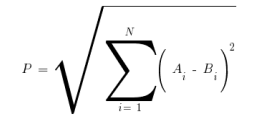
где
 - расстояние между объектами A и B;
 - значение i-свойства объекта A;
 - значение i-свойства объекта B.
 
2. *Квадрат евклидова расстояния*

Данная мера расстояния используется в тех случаях, когда требуется
придать больше значение более отдаленным друг от друга объектам. Это
расстояние вычисляется следующим образом:

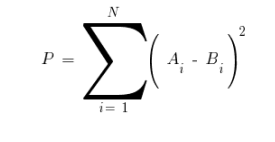

3. *Взвешенное евклидово расстояние*

Применяется в тех случаях, когда каждому i-свойству удается приписать
некоторый «вес» wi, пропорционально степени важности признака в задаче
классификации:

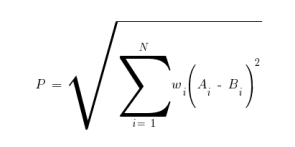

4. *Хеммингово расстояние*

Также называется манхэттенским, сити-блок расстоянием или расстоянием
городских кварталов. Это расстояние является разностью по координатам.
Хеммингово расстояние вычисляется по формуле:

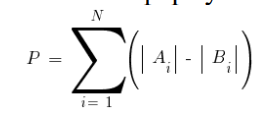

5. *Расстояние Чебышева*

Принимает значение наибольшего модуля разности между значениями
соответствующих свойств (признаков) объектов:

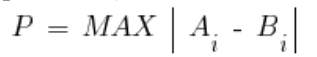

Выбор меры расстояния и весов для классифицирующих свойств –
очень важный этап, так как от этих процедур зависят состав и количество
формируемых классов, а также степень сходства объектов внутри классов.

## 1.2.3 Пример

In [5]:
import numpy as np
def euclidean_distance(v1, v2):
    return sum((x - y) ** 2 for x, y in zip(v1, v2)) ** 0.5

x = np.array([0,0,0])
y = np.array([3,3,3])
print("Евклидово расстояние")
print(euclidean_distance(x,y))

Евклидово расстояние
5.196152422706632


## 1.2.4 Пример

In [6]:
def sqr_euclidean_distance(v1, v2):
    return sum((x - y) ** 2 for x, y in zip(v1, v2))

def weighted_euclidean_distance(v1, v2, w):
    return sum((x - y) ** 2 * s for x, y, s in zip(v1, v2, w)) ** 0.5

def manhattan_distance(v1, v2):
    return sum(abs(x - y) for (x, y) in zip(v1, v2))

def chebyshev_distance(v1, v2):
    return max(abs(x - y) for (x, y) in zip(v1, v2))

x = np.array([0,0,0])
y = np.array([3,3,3])
w = np.array([0,0,1])

In [7]:
print("Квадрат евклидова расстояния ", sqr_euclidean_distance(x,y))
print("Взвешенное евклидово расстояние ", weighted_euclidean_distance(x,y,w))
print("Хеммингово расстояние ", manhattan_distance(x,y))
print("Расстояние Чебышева ", chebyshev_distance(x,y))

Квадрат евклидова расстояния  27
Взвешенное евклидово расстояние  3.0
Хеммингово расстояние  9
Расстояние Чебышева  3


## 1.2.5 Пример

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

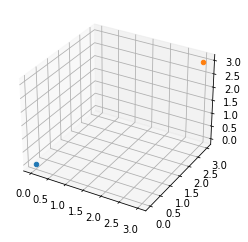

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
plt.show()

## 1.2.6 Пример

In [11]:
#Расстояние Евклида
print("Евклидова расстояние", np.linalg.norm(x-y))
#Квадрат евклидова расстояния
print("Квадрат евклидова расстояния", np.linalg.norm(x-y) ** 2)
#Расстояние Чебышева
print("Расстояние Чебышева", np.linalg.norm(x-y, ord=np.inf))
#Расстояние Хемминга
print("Расстояние Хемминга", np.linalg.norm(x-y, ord=1))

Евклидова расстояние 5.196152422706632
Квадрат евклидова расстояния 27.0
Расстояние Чебышева 3.0
Расстояние Хемминга 9.0


## 1.3.1 Задание

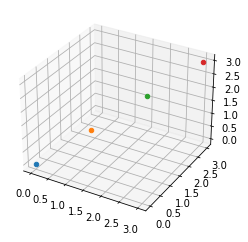

Расстояние Евклида 1.7320508075688772
Квадрат евклидова расстояния 27.0
Расстояние Чебышева 3.0
Расстояние Хемминга 9.0


In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0, 0, 0)
ax.scatter(1, 1, 1)
ax.scatter(2, 2, 2)
ax.scatter(3, 3, 3)
plt.show()

#Расстояние Евклида
x_1 = np.array([0, 0, 0])
y_1 = np.array([1, 1, 1])
print("Расстояние Евклида", np.linalg.norm(x_1 - y_1))

#Квадрат евклидова расстояния
x_2 = np.array([0, 0, 0])
y_2 = np.array([2, 2, 2])
print("Квадрат евклидова расстояния", np.linalg.norm(x-y) ** 2)

#Расстояние Чебышева
x_3 = np.array([0, 0, 0])
y_3 = np.array([3, 3, 3])
print("Расстояние Чебышева", np.linalg.norm(x-y, ord=np.inf))

#Расстояние Хемминга
x_3 = np.array([0, 0, 0])
y_3 = np.array([3, 3, 3])
print("Расстояние Хемминга", np.linalg.norm(x-y, ord=1))

## 1.3.2 Задание

In [13]:
z = np.zeros((5,5))
z += np.arange(5)
for i in range(5):
    for j in range(5):
        print(z[i][j], end =" ")
    print()

0.0 1.0 2.0 3.0 4.0 
0.0 1.0 2.0 3.0 4.0 
0.0 1.0 2.0 3.0 4.0 
0.0 1.0 2.0 3.0 4.0 
0.0 1.0 2.0 3.0 4.0 


# 2.1. Теоретический материал – Задачи классификации

Метод k-ближайших соседей используется для решения задачи
классификации. Он относит объекты к классу, которому принадлежит
большинство из k его ближайших соседей в многомерном пространстве
признаков. Это один из простейших алгоритмов обучения
классификационных моделей. Число k – это количество соседних объектов
в пространстве признаков, которые сравниваются с классифицируемым
объектом. Иными словами, если k=10, то каждый объект сравнивается с 10-
ю соседями. В процессе обучения алгоритм просто запоминает все векторы
признаков и соответствующие им метки классов. При работе с реальными
данными, т.е. наблюдениями, метки класса которых неизвестны,
вычисляется расстояние между вектором нового наблюдения и ранее
запомненными. Затем выбирается k ближайших к нему векторов, и новый
объект относится к классу, которому принадлежит большинство из них.
Приведем алгоритм метода.

1. Выберите значение K соседей (скажем, k = 5)
2. Найдите ближайшую точку данных K (5) для нашей новой точки данных на основе евклидова расстояния (которое мы обсудим позже)
3. Среди этих K точек данных подсчитайте точки данных в каждой категории.
4. Назначьте новую точку данных категории, которая имеет наибольшее количество соседей с новой точкой данных.

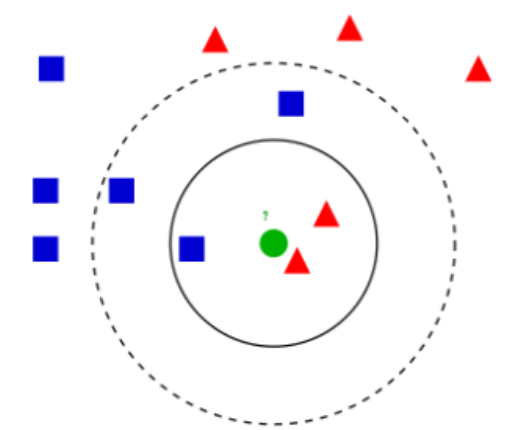

Модуль библиотеки sklearn - sklearn.neighbors предоставляет
функциональные возможности для контролируемого обучения на основе
соседей. Обучение на основе контролируемых соседей бывает двух видов:
классификация данных с дискретными метками и регрессия для данных с
непрерывными метками. В данном разделе рассмотрим несколько примеров
с использованием названного метода.


## 2.2.1 Пример

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# данные
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]


# обучаем модель k-ближайших соседей к данным
k = 3

model = KNeighborsClassifier(n_neighbors = k)
model.fit(x, target)
print(model)

# делаем прогноз
print("(-2,-2) is class"),
print(model.predict([[-2,-2]]))

print("(1,3) is class"),
print(model.predict([[1,3]]))

KNeighborsClassifier(n_neighbors=3)
(-2,-2) is class
[0]
(1,3) is class
[1]


## 2.2.2 Пример

In [16]:
import seaborn as sns

In [17]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 2.2.3 Пример

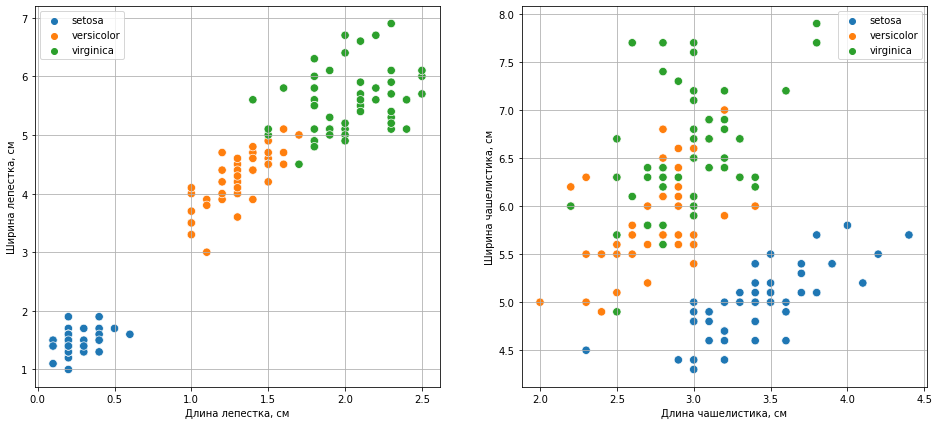

In [18]:
# Объявляем фигуру из двух графиков и ее размер
plt.figure(figsize=(16, 7))

# Левый график
plt.subplot(121)
sns.scatterplot(
    data=iris, # из этой таблиц нарисовать точки
    x="petal_width", y="petal_length", # с этими координатами
    hue="species", # для которых цвет определить согласно этому столбцу
    s=70 # размер точек

)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend() # добавить легенду
plt.grid() # добавить сетку

# Правый график аналогично
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue="species", s=70)
plt.xlabel("Длина чашелистика, см")
plt.ylabel("Ширина чашелистика, см")
plt.legend()
plt.grid();


## 2.2.4 Пример

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas-таблица, для нее нужно указать iloc
    iris.iloc[:, :-1], # берем все колонки кроме последней в признаки
    iris.iloc[:, -1], # последнюю в целевую переменную (класс)
    test_size = .2 # размер тестовой выборки (20%)
)
print("Размеры выборок (обучающей и тестовой) x_train, x_test, y_train, y_test")
x_train.shape, x_test.shape, y_train.shape, y_test.shape

Размеры выборок (обучающей и тестовой) x_train, x_test, y_train, y_test


((120, 4), (30, 4), (120,), (30,))

In [21]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
122,7.7,2.8,6.7,2.0
42,4.4,3.2,1.3,0.2
136,6.3,3.4,5.6,2.4
123,6.3,2.7,4.9,1.8
138,6.0,3.0,4.8,1.8


In [22]:
y_train.head()

122    virginica
42        setosa
136    virginica
123    virginica
138    virginica
Name: species, dtype: object

In [23]:
# Обучим метод трех ближайших соседей
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
# Получим предсказания модели
y_pred = model.predict(x_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica'],
      dtype=object)

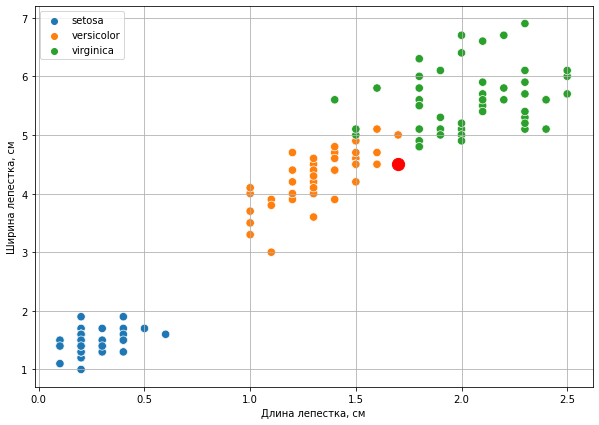

In [24]:
# покажем на графике, что отражает полученное число
# Красным цветом обозначим точки, для которых классификация сработала неправильно
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend(loc=2)
plt.grid()
# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # То подсвечиваем точку красным
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)

In [25]:
# Качество модели (доля правильно классифицированных точек)
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 0.967


## 2.3.1 Задание

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas-таблица, для нее нужно указать iloc
    iris.iloc[:, :-1], # берем все колонки кроме последней в признаки
    iris.iloc[:, -1], # последнюю в целевую переменную (класс)
    test_size = .15 # размер тестовой выборки (15%)
)
print("Размеры выборок (обучающей и тестовой) x_train, x_test, y_train, y_test")
x_train.shape, x_test.shape, y_train.shape, y_test.shape

Размеры выборок (обучающей и тестовой) x_train, x_test, y_train, y_test


((127, 4), (23, 4), (127,), (23,))

In [27]:
# Обучим метод трех ближайших соседей
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
# Получим предсказания модели
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica'], dtype=object)

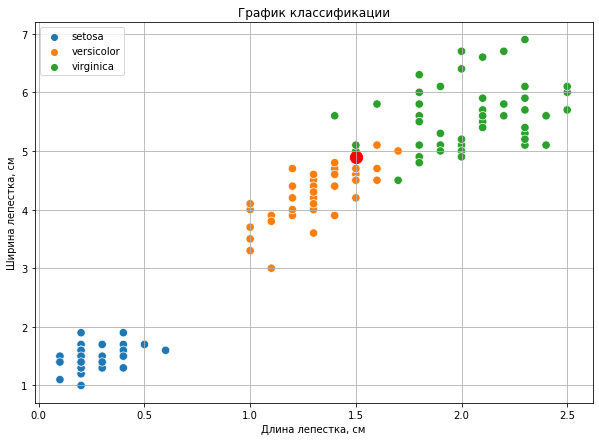

In [28]:
# покажем на графике, что отражает полученное число
# Красным цветом обозначим точки, для которых классификация сработала неправильно
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend(loc=2)
plt.title("График классификации")
plt.grid()
# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # То подсвечиваем точку красным
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)

In [29]:
# Обучим метод трех ближайших соседей
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
# Получим предсказания модели
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica'], dtype=object)

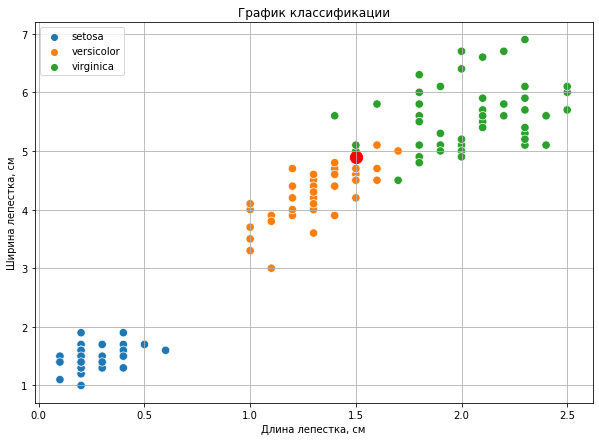

In [30]:
# покажем на графике, что отражает полученное число
# Красным цветом обозначим точки, для которых классификация сработала неправильно
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend(loc=2)
plt.title("График классификации")
plt.grid()
# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # То подсвечиваем точку красным
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)

In [31]:
# Обучим метод трех ближайших соседей
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
# Получим предсказания модели
y_pred = model.predict(x_test)
print("наше предсказание")
y_pred

наше предсказание


array(['versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica'], dtype=object)

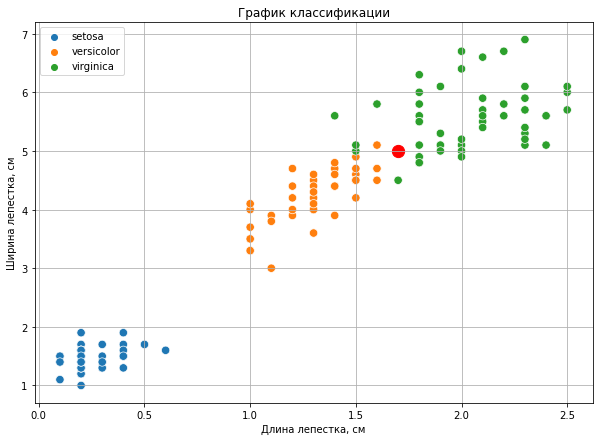

In [32]:
# покажем на графике, что отражает полученное число
# Красным цветом обозначим точки, для которых классификация сработала неправильно
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend(loc=2)
plt.title("График классификации")
plt.grid()
# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # То подсвечиваем точку красным
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)

# 3.1. Теоретический материал – Работа с категориальными данными

Часто бывает полезно разбивать объекты на категории не по
количеству, а по качеству. Эта качественная информация нередко
представляется как принадлежность наблюдения к отдельной категории,
такой как пол, цвета или марка автомобиля. Однако не все категориальные
данные одинаковые. Наборы категорий без внутреннего упорядочения
называются номинальными. Примеры номинальных категорий включают:

- синий, красный, зеленый;
- мужчина, женщина;
- банан, клубника, яблоко.

С другой стороны, когда набор категорий имеет некое естественное
упорядочение, мы называем его порядковым. Например:

- низкий, средний, высокий;
- молодые, старые;
- согласен, нейтрален, не согласен.

Более того, категориальная информация часто представлена в данных
в виде вектора или столбца символьных значений (например, "Москва",
"Санкт-Петербург", "Казань"). Проблема в том, что большинство машиннообучающихся алгоритмов требуют ввода числовых значений.

Алгоритм k ближайших соседей предоставляет простой пример.
Одним из шагов в алгоритме является вычисление расстояний между
наблюдениями — часто с использованием евклидова расстояния. Однако
вычисление расстояния, очевидно, невозможно, если значение х, является
строковым типом (например, "Москва"). Для того чтобы его можно было
ввести в уравнение евклидова расстояния, нам нужно преобразовать это
строковое значение в числовой формат. Наша цель — сделать
преобразование, которое правильно передает информацию в категориях
(упорядоченность, относительные интервалы между категориями и т. д.).
Существует большое количество методов кодирования категориальных
данных, среди которых нет универсальных. Выбирая метод, стоит
отталкиваться от ваших данных, мощности множества категорий и
алгоритма машинного обучения.

Далее рассмотрим некоторые методы таких преобразований.

In [33]:
import pandas as pd

## 3.2.1 Пример

In [34]:
# Создать признаки
dataframe = pd.DataFrame({"оценка" : ["низкая", "низкая", "средняя", "средняя", "высокая"]})
# Создать словарь преобразованя шкалы
scale_mapper = {"низкая":1, "средняя":2, "высокая":3}
# Заменить значения признаков значениями словаря
dataframe["оценка"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

## 3.2.2 Пример

In [35]:
from sklearn.feature_extraction import DictVectorizer
# Создать словарь
data_dict = [{"красный":2, "синий":4},
             {"красный":4, "синий":3},
             {"красный":1, "желтый":2},
             {"красный":2, "желтый":2}]
# Создать векторизатор словаря
dictvectorizer = DictVectorizer(sparse=False)
# Конвертировать словарь в матрицу признаков
features = dictvectorizer.fit_transform(data_dict)
print("Matrix of features")
features

Matrix of features


array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

## 3.3.2 Задание

In [41]:
# Создать словарьцвета глаз :D 
data_dict = [{"зеленый":1, "карий":1, "Мужской": 1, "Женский": 1},
             {"карий":3, "зеленый":9, "Мужской": 4, "Женский": 8},
             {"зеленый":3, "карий":1, "Мужской": 3, "Женский": 1},
             {"зеленый":1, "карий":5, "Мужской": 3, "Женский": 1},
             {"Мужской": 7, "Женский": 2}]
# Создать векторизатор словаря
dictvectorizer = DictVectorizer(sparse=False)
# Конвертировать словарь в матрицу признаков
features = dictvectorizer.fit_transform(data_dict)
print("Matrix of features")
features

Matrix of features


array([[1., 1., 1., 1.],
       [8., 4., 9., 3.],
       [1., 3., 3., 1.],
       [1., 3., 1., 5.],
       [2., 7., 0., 0.]])